![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Redes Neuronales

En este notebook aprenderá a construir y a entrenar redes neuronales de una capa y multicapas, usando la librería [Keras](https://keras.io/).

Este notebook tiene una licencia de [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Un agradecimiento especial para [Valerio Maggio](https://mpba.fbk.eu).

## Instrucciones Generales

Keras es una librería de redes neuronales altamente modular, escrita en Python y capaz de ejecutarse sobre TensorFlow o Theano. Fue desarrollada con el objetivo de permitir una experimentación rápida con modelos de redes neuronales.

Este notebook esta compuesto por dos secciones. En la primera sección, usted beberá construir y entrenar una red neuronal de una capa para predecir el precio de una casa con el set de datos Boston Housing Data. En la segunda parte, se usará el mismo dataset pero usted beberá construir y entrenar una red neuronal multicapa para identificar sus ventajas. Para conocer más detalles de la base, puede ingresar al siguiente [vínculo](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/).
   
Para realizar la actividad, solo siga las indicaciones asociadas a cada celda del notebook. 

## Importar base de datos y librerías

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.datasets import load_boston
# Carga de datos de la librería sklearn
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Definición de variables predictoras  y de interés

In [4]:
# Definición de variables predictoras (X)
X = boston.drop(boston.columns[-1],axis=1)
# Definición de variable de interés (y)
Y = pd.DataFrame(np.array(boston_dataset.target), columns=['labels'])

In [5]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.3 ,random_state=22)
type(X_train)

pandas.core.frame.DataFrame

In [6]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [7]:
# Definición de dimensiones de salida, varaibles de interés
output_var = Y_train.shape[1]
print(output_var, ' output variables')

1  output variables


In [8]:
# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

12 input variables


# Red neuronal de una sola capa

In [9]:
# Importación librerías
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

In [10]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

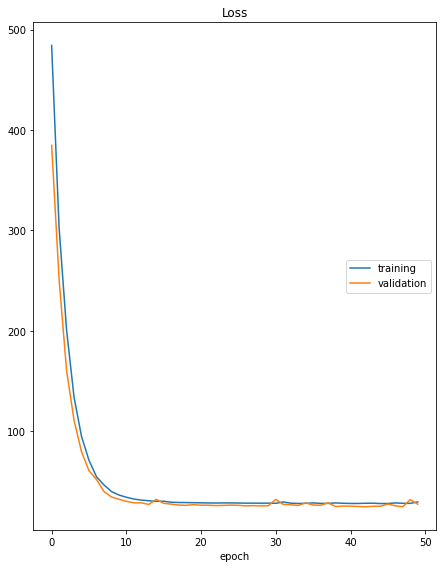

Loss
	training         	 (min:   28.063, max:  484.206, cur:   29.669)
	validation       	 (min:   24.882, max:  384.745, cur:   27.407)
12/12 [==============================] - 0s 29ms/step - loss: 29.6689 - val_loss: 27.4070


In [12]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=50, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

## Red neuronal de una sola capa con early stopping

In [13]:
# Importación librerías
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [14]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

In [16]:
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

In [17]:
# Entrenamiento de la red neuronal con 50 épocas y early stopping
model.fit(X_train, Y_train, 
          verbose=True, 
          epochs=50, 
          batch_size=128,
          validation_data=(X_test,Y_test),
          callbacks=[best_model, early_stop])

Epoch 1/50
3/3 [==============================] - 0s 64ms/step - loss: 541.6776 - val_loss: 541.4011
Epoch 2/50
3/3 [==============================] - 0s 29ms/step - loss: 481.9247 - val_loss: 482.3522
Epoch 3/50
3/3 [==============================] - 0s 32ms/step - loss: 429.9276 - val_loss: 431.3716
Epoch 4/50
3/3 [==============================] - 0s 32ms/step - loss: 384.3050 - val_loss: 386.1591
Epoch 5/50
3/3 [==============================] - 0s 30ms/step - loss: 344.6863 - val_loss: 346.0499
Epoch 6/50
3/3 [==============================] - 0s 28ms/step - loss: 309.3674 - val_loss: 310.9236
Epoch 7/50
3/3 [==============================] - 0s 31ms/step - loss: 278.1700 - val_loss: 279.5092
Epoch 8/50
3/3 [==============================] - 0s 28ms/step - loss: 250.1513 - val_loss: 251.6772
Epoch 9/50
3/3 [==============================] - 0s 27ms/step - loss: 226.0755 - val_loss: 227.0862
Epoch 10/50
3/3 [==============================] - 0s 27ms/step - loss: 204.2107 - val_loss

# Red Neuronal Multicapa

In [18]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3328      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 69,377
Trainable params: 69,377
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

In [20]:
# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

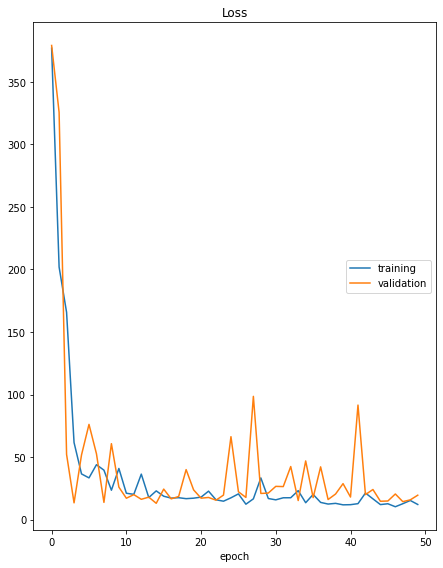

Loss
	training         	 (min:   10.284, max:  376.952, cur:   12.089)
	validation       	 (min:   13.034, max:  379.109, cur:   19.509)
10/10 [==============================] - 0s 30ms/step - loss: 12.0892 - val_loss: 19.5093


In [21]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=50, 
          callbacks=[PlotLossesKeras()])

### TRABAJO FINAL MATERIA - RED NEURONAL DE UNA CAPA

#### Red neuronal de una capa sin tratar datos

In [17]:
# Carga de datos de archivo .csv
# Importación librerías
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from keras import backend as K
from livelossplot import PlotLossesKeras
from keras.models import Sequential
from keras.layers import Dense, Activation


dataTraining = pd.read_csv('dataTraining.csv', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('dataTesting.csv', encoding='UTF-8', index_col=0)

# Importación de librerias
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...


True

In [148]:
# Definición de variables predictoras (X)
vect = CountVectorizer(max_features=1000)
X_dtm = vect.fit_transform(dataTraining['plot'])
# Definición de variable de interés (y)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [15]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

In [16]:
X_train = X_train.toarray()
X_test = X_test.toarray()


In [17]:
# Definición de dimensiones de salida y entrada
output_var = y_test_genres.shape[1]
print(output_var, ' output variables')

dims = X_train.shape[1]
print(dims, 'input variables')

24  output variables
1000 input variables


In [18]:
# Red neuronal de una sola capa
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, activation='sigmoid', input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                24024     
                                                                 
Total params: 24,024
Trainable params: 24,024
Non-trainable params: 0
_________________________________________________________________
None


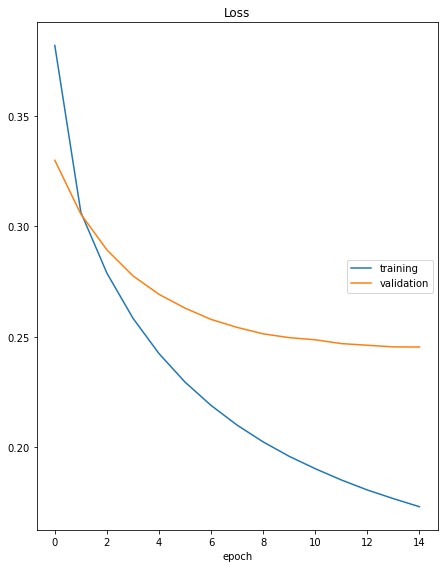

Loss
	training         	 (min:    0.173, max:    0.382, cur:    0.173)
	validation       	 (min:    0.245, max:    0.330, cur:    0.245)
166/166 [==============================] - 1s 4ms/step - loss: 0.1731 - val_loss: 0.2454


0.7816287128290126

In [19]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='adam', loss='binary_crossentropy')

# Entrenamiento de la red neuronal con 100 épocas
model.fit(X_train, y_train_genres,
          verbose=1,
          epochs=15,
          validation_data=(X_test, y_test_genres),
          callbacks=[PlotLossesKeras()])

# Obtener las predicciones del modelo en el conjunto de test
y_pred_genres = model.predict(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred_genres, average='macro')


In [122]:
#transformación variables predictoras X del conjunto de test
X_test_dtm = vect.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Predicción del conjunto de test
y_pred_test_genres = model.predict(X_test_dtm)
# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)
res.to_csv('pred_genres_text_RF.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.083696,2.542231e-01,3.955425e-05,9.788573e-04,0.432622,0.009827,1.107550e-06,0.408686,2.209008e-03,6.167387e-01,...,0.000364,0.031941,1.607606e-13,0.987834,0.010361,8.869105e-10,2.868325e-03,0.016304,8.718967e-04,9.657657e-05
4,0.011326,8.587539e-04,1.805127e-04,7.706654e-02,0.071781,0.476179,1.865038e-02,0.866215,6.654263e-04,4.752278e-04,...,0.001623,0.012086,5.840195e-07,0.006049,0.000593,7.637341e-06,9.301488e-05,0.131377,5.091757e-03,6.800670e-05
5,0.000075,2.087943e-11,3.939168e-27,2.329350e-04,0.000165,0.999807,3.267026e-11,0.951614,1.948271e-15,2.747027e-07,...,0.000043,0.985898,0.000000e+00,0.000766,0.000188,7.957745e-31,9.082344e-13,0.638535,5.971686e-15,6.764250e-23
6,0.000309,5.263448e-03,6.355688e-11,4.175019e-02,0.001174,0.000137,9.179735e-09,0.998106,1.998391e-05,3.597915e-03,...,0.000207,0.000144,3.132926e-23,0.020194,0.001558,1.229521e-19,8.486273e-07,0.723398,5.284299e-01,4.712607e-08
7,0.000329,9.895951e-03,6.335546e-08,1.368730e-07,0.160795,0.005378,5.448824e-16,0.076282,1.386404e-04,4.385517e-01,...,0.000002,0.001913,4.257806e-21,0.219047,0.227805,1.520042e-10,4.916599e-15,0.255219,6.126446e-07,2.399034e-07


### Normalizando los datos (Media=0 y Desviacion estandar =1)

In [52]:
# Carga de datos de archivo .csv
# Importación librerías
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from keras import backend as K
from livelossplot import PlotLossesKeras
from keras.models import Sequential
from keras.layers import Dense, Activation


dataTraining = pd.read_csv('dataTraining.csv', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('dataTesting.csv', encoding='UTF-8', index_col=0)

# Importación de librerias
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('omw-1.4')

# Definición de variables predictoras (X)
vect = CountVectorizer(max_features=1000)
X_dtm = vect.fit_transform(dataTraining['plot'])
# Definición de variable de interés (y)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

X_train = X_train.toarray()
X_train = pd.DataFrame(X_train)

X_test = X_test.toarray()
X_test = pd.DataFrame(X_test)


[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [53]:
from scipy.sparse import csr_matrix
# Convertir a matriz densa de NumPy
X_dtm_dense = X_dtm.toarray()
# Convertir a DataFrame de pandas
X_dtm_df = pd.DataFrame(X_dtm_dense)



In [54]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X_dtm_df)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
X_test = np.array(X_test)


In [55]:
# Definición de dimensiones de salida y entrada
output_var = y_test_genres.shape[1]
print(output_var, ' output variables')

dims = X_train.shape[1]
print(dims, 'input variables')

# Red neuronal de una sola capa
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, activation='sigmoid', input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

24  output variables
1000 input variables
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                24024     
                                                                 
Total params: 24,024
Trainable params: 24,024
Non-trainable params: 0
_________________________________________________________________
None


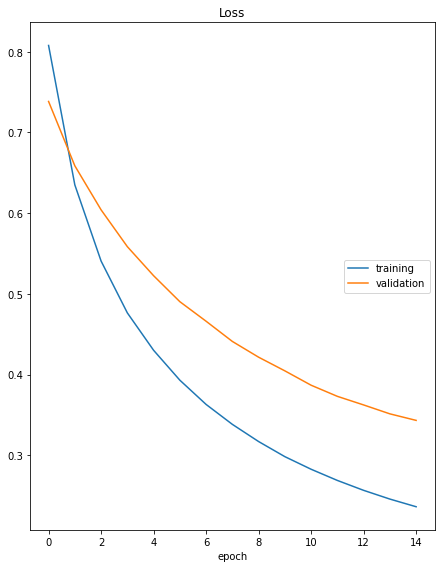

Loss
	training         	 (min:    0.236, max:    0.808, cur:    0.236)
	validation       	 (min:    0.343, max:    0.738, cur:    0.343)
166/166 [==============================] - 1s 4ms/step - loss: 0.2362 - val_loss: 0.3432


0.7487885405182291

In [56]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='adam', loss='binary_crossentropy')

# Entrenamiento de la red neuronal con 100 épocas
model.fit(X_train, y_train_genres,
          verbose=1,
          epochs=15,
          validation_data=(X_test, y_test_genres),
          callbacks=[PlotLossesKeras()])

# Obtener las predicciones del modelo en el conjunto de test
y_pred_genres = model.predict(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred_genres, average='macro')


#### Haciendo limpieza de datos + stopwords + normalizacion

In [104]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

# Descargar stopwords de NLTK si no están disponibles
import nltk
nltk.download('stopwords')

# Inicializar lematizador y lista de stop words
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Función para lematizar el texto con verbos y eliminar puntuación y palabras no significativas
def split_into_lemmas(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = re.sub(r'[^\w\s]', '', text)
    # Dividir en palabras
    words = text.split()
    # Eliminar stop words y palabras no significativas, y lematizar
    lemmatized_words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words if word not in stop_words and len(word) > 2]
    return lemmatized_words

# Definición de variables predictoras (X) - Analyzer personalizado maneja lowercase y stopwords
vect = CountVectorizer(lowercase=False, stop_words=None, max_features=1000, analyzer=split_into_lemmas)
X_dtm = vect.fit_transform(dataTraining['plot'])
X_dtm.shape

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(7895, 1000)

In [105]:
# Definición de variable de interés (y)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)
X_train = X_train.toarray()
X_test = X_test.toarray()


# Definición de dimensiones de salida y entrada
output_var = y_test_genres.shape[1]
print(output_var, ' output variables')

dims = X_train.shape[1]
print(dims, 'input variables')

# Red neuronal de una sola capa
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, activation='sigmoid', input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

24  output variables
1000 input variables
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                24024     
                                                                 
Total params: 24,024
Trainable params: 24,024
Non-trainable params: 0
_________________________________________________________________
None


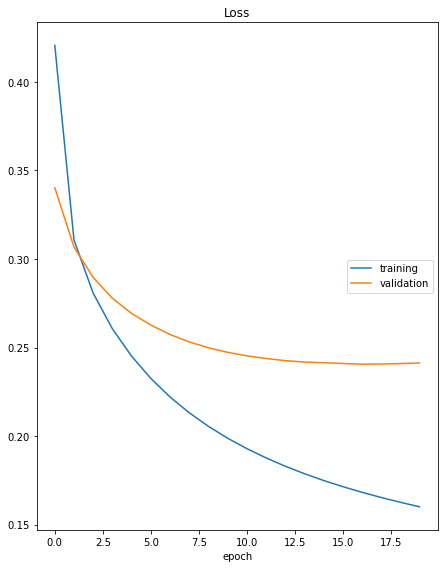

Loss
	training         	 (min:    0.160, max:    0.421, cur:    0.160)
	validation       	 (min:    0.241, max:    0.340, cur:    0.241)
166/166 [==============================] - 1s 4ms/step - loss: 0.1601 - val_loss: 0.2413


0.7972543072748723

In [106]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='adam', loss='binary_crossentropy')

# Entrenamiento de la red neuronal con 100 épocas
model.fit(X_train, y_train_genres,
          verbose=1,
          epochs=20,
          validation_data=(X_test, y_test_genres),
          callbacks=[PlotLossesKeras()])

# Obtener las predicciones del modelo en el conjunto de test
y_pred_genres = model.predict(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred_genres, average='macro')


#### RED NEURONAL MULTICAPA  ----> Hasta el momento mejor prediccion

In [128]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

# Descargar stopwords de NLTK si no están disponibles
import nltk
nltk.download('stopwords')

# Inicializar lematizador y lista de stop words
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Función para lematizar el texto con verbos y eliminar puntuación y palabras no significativas
def split_into_lemmas(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = re.sub(r'[^\w\s]', '', text)
    # Dividir en palabras
    words = text.split()
    # Eliminar stop words y palabras no significativas, y lematizar
    lemmatized_words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words if word not in stop_words and len(word) > 2]
    return lemmatized_words

# Definición de variables predictoras (X) - Analyzer personalizado maneja lowercase y stopwords
vect = CountVectorizer(lowercase=False, stop_words=None, max_features=1000, analyzer=split_into_lemmas)
X_dtm = vect.fit_transform(dataTraining['plot'])
print(X_dtm.shape)
# Definición de variable de interés (y)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)
X_train = X_train.toarray()
X_test = X_test.toarray()


# Definición de dimensiones de salida y entrada
output_var = y_test_genres.shape[1]
print(output_var, ' output variables')

dims = X_train.shape[1]
print(dims, 'input variables')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(7895, 1000)
24  output variables
1000 input variables


In [129]:

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='sigmoid'))
model.add(Dense(256,activation='sigmoid'))
model.add(Dense(output_var))
model.add(Activation('sigmoid'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               256256    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 24)                6168      
                                                                 
 activation (Activation)     (None, 24)                0         
                                                                 
Total params: 328,216
Trainable params: 328,216
Non-trainable params: 0
_________________________________________________________________
None


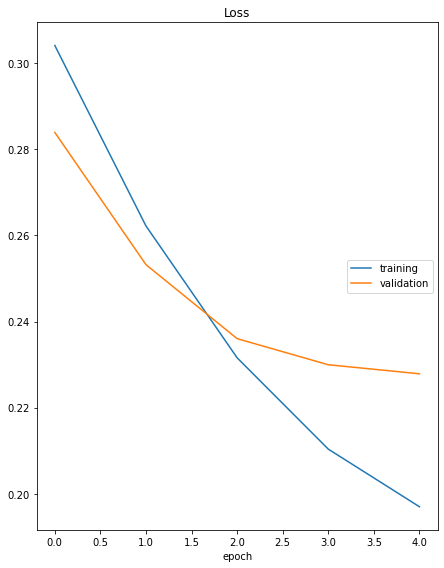

Loss
	training         	 (min:    0.197, max:    0.304, cur:    0.197)
	validation       	 (min:    0.228, max:    0.284, cur:    0.228)
166/166 [==============================] - 1s 7ms/step - loss: 0.1970 - val_loss: 0.2279


0.8371335558229007

In [130]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='adam', loss='binary_crossentropy')

# Entrenamiento de la red neuronal con 100 épocas
model.fit(X_train, y_train_genres,
          verbose=1,
          epochs=5,
          validation_data=(X_test, y_test_genres),
          callbacks=[PlotLossesKeras()])

# Obtener las predicciones del modelo en el conjunto de test
y_pred_genres = model.predict(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

In [131]:
#transformación variables predictoras X del conjunto de test
X_test_dtm = vect.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Predicción del conjunto de test
y_pred_test_genres = model.predict(X_test_dtm)
# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)
res.to_csv('pred_genres_text_RF.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.010499,0.019097,0.006728,0.018274,0.378450,0.070925,0.007509,0.674868,0.016487,0.060909,...,0.027430,0.062426,0.001125,0.714297,0.010047,0.012945,0.004094,0.116311,0.004964,0.014821
4,0.037533,0.007030,0.003659,0.132742,0.216836,0.297568,0.192518,0.762320,0.006320,0.007101,...,0.009509,0.027598,0.001481,0.078508,0.009966,0.013207,0.028226,0.181358,0.024925,0.023643
5,0.021676,0.000800,0.000201,0.036531,0.053726,0.887612,0.035701,0.904820,0.000153,0.001518,...,0.001968,0.384306,0.000923,0.100444,0.005044,0.002531,0.001924,0.725763,0.008228,0.005608
6,0.007103,0.014612,0.002605,0.065217,0.071906,0.007466,0.043085,0.933171,0.008001,0.016599,...,0.006346,0.025166,0.001020,0.252438,0.021831,0.006177,0.010621,0.084500,0.105369,0.016501
7,0.025850,0.029945,0.011201,0.008643,0.053256,0.013443,0.040926,0.329750,0.017123,0.103983,...,0.002515,0.198226,0.000803,0.025843,0.611637,0.011281,0.003281,0.513832,0.005085,0.014991


PUEDO BORRAR ESTA - SOLO ESTOY PROBANDO CON EL OPTIMIZADOR DE SGD

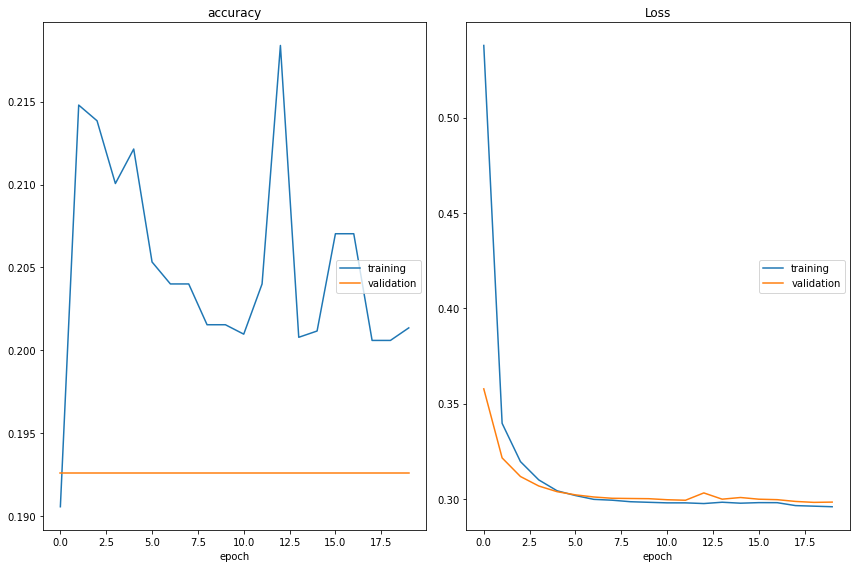

accuracy
	training         	 (min:    0.191, max:    0.218, cur:    0.201)
	validation       	 (min:    0.193, max:    0.193, cur:    0.193)
Loss
	training         	 (min:    0.296, max:    0.538, cur:    0.296)
	validation       	 (min:    0.298, max:    0.358, cur:    0.298)
166/166 [==============================] - 2s 10ms/step - loss: 0.2959 - accuracy: 0.2014 - val_loss: 0.2983 - val_accuracy: 0.1926 - lr: 2.0000e-04
ROC AUC Score: 0.5552856944838851


In [152]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import nltk
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from keras import backend as K
from livelossplot import PlotLossesKeras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2


# Descargar stopwords de NLTK si no están disponibles
nltk.download('stopwords')

# Inicializar lematizador y lista de stop words
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Función para lematizar el texto con verbos y eliminar puntuación y palabras no significativas
def split_into_lemmas(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    lemmatized_words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words if word not in stop_words and len(word) > 2]
    return lemmatized_words

# Definición de variables predictoras (X)
vect = CountVectorizer(lowercase=False, stop_words=None, max_features=1000, analyzer=split_into_lemmas)
X_dtm = vect.fit_transform(dataTraining['plot'])
print(X_dtm.shape)

# Definición de variable de interés (y)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usando train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)
X_train = X_train.toarray()
X_test = X_test.toarray()

# Definición de dimensiones de salida y entrada
output_var = y_test_genres.shape[1]
print(output_var, 'output variables')

dims = X_train.shape[1]
print(dims, 'input variables')

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
model.add(Dense(256, input_shape=(dims,), activation='sigmoid', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='sigmoid', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(output_var, activation='sigmoid', kernel_regularizer=l2(0.001)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy')

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Entrenamiento de la red neuronal
model.fit(X_train, y_train_genres,
          verbose=1,
          epochs=20,
          batch_size=32,
          validation_data=(X_test, y_test_genres),
          callbacks=[PlotLossesKeras(), early_stopping, reduce_lr])

# Obtener las predicciones del modelo en el conjunto de test
y_pred_genres = model.predict(X_test)

# Impresión del desempeño del modelo
print("ROC AUC Score:", roc_auc_score(y_test_genres, y_pred_genres, average='macro'))


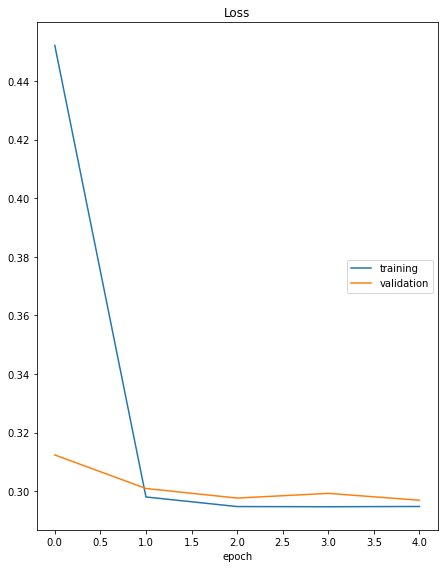

Loss
	training         	 (min:    0.295, max:    0.452, cur:    0.295)
	validation       	 (min:    0.297, max:    0.312, cur:    0.297)
166/166 [==============================] - 1s 9ms/step - loss: 0.2948 - val_loss: 0.2969


0.5371906957209251

In [159]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

# Descargar stopwords de NLTK si no están disponibles
import nltk
nltk.download('stopwords')

# Inicializar lematizador y lista de stop words
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Función para lematizar el texto con verbos y eliminar puntuación y palabras no significativas
def split_into_lemmas(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = re.sub(r'[^\w\s]', '', text)
    # Dividir en palabras
    words = text.split()
    # Eliminar stop words y palabras no significativas, y lematizar
    lemmatized_words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words if word not in stop_words and len(word) > 2]
    return lemmatized_words

# Definición de variables predictoras (X) - Analyzer personalizado maneja lowercase y stopwords
vect = CountVectorizer(lowercase=False, stop_words=None, max_features=1000, analyzer=split_into_lemmas)
X_dtm = vect.fit_transform(dataTraining['plot'])
print(X_dtm.shape)
# Definición de variable de interés (y)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)
X_train = X_train.toarray()
X_test = X_test.toarray()


# Definición de dimensiones de salida y entrada
output_var = y_test_genres.shape[1]
print(output_var, ' output variables')

dims = X_train.shape[1]
print(dims, 'input variables')

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='sigmoid', kernel_regularizer=l2(0.001)))
model.add(Dense(256,activation='sigmoid', kernel_regularizer=l2(0.001)))
model.add(Dense(output_var))
model.add(Activation('sigmoid'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='adam', loss='binary_crossentropy')

# Entrenamiento de la red neuronal con 100 épocas
model.fit(X_train, y_train_genres,
          verbose=1,
          epochs=5,
          validation_data=(X_test, y_test_genres),
          callbacks=[PlotLossesKeras()])

# Obtener las predicciones del modelo en el conjunto de test
y_pred_genres = model.predict(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

# SIGUIENDO EJEMPLO DE CAMI

In [19]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import pandas as pd
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from keras import backend as K
from livelossplot import PlotLossesKeras
from keras.models import Sequential
from keras.layers import Dense, Activation

# Descargar stopwords de NLTK si no están disponibles
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('dataTraining.csv', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('dataTesting.csv', encoding='UTF-8', index_col=0)


In [37]:
# Inicializar lematizador y lista de stop words
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Función para lematizar el texto con verbos y eliminar puntuación y palabras no significativas
def split_into_lemmas(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = re.sub(r'[^\w\s]', '', text)
    # Dividir en palabras
    words = text.split()
    # Eliminar stop words y palabras no significativas, y lematizar
    lemmatized_words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words if word not in stop_words and len(word) > 2]
    return lemmatized_words

# Definición de variables predictoras (X) - Analyzer personalizado maneja lowercase y stopwords
#vect = CountVectorizer(lowercase=False, stop_words=None, max_features=1000, analyzer=split_into_lemmas)

vect_tfidf = TfidfVectorizer()
X_train = vect_tfidf.fit_transform(dataTraining['plot'])
X_test_tfidf = vect_tfidf.transform(dataTesting['plot'])
X_train = X_train.toarray()
#X_dtm = vect.fit_transform(dataTraining['plot'])

#print(X_dtm.shape)
#print(X_train_tfidf.shape)

# Definición de variable de interés (y)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
#X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_train_tfidf, y_genres, test_size=0.33, random_state=42)
#X_train = X_train.toarray()
#X_test = X_test.toarray()

# Definición de dimensiones de salida y entrada
output_var = y_genres.shape[1]
print(output_var, ' output variables')

dims = X_train.shape[1]
print(dims, 'input variables')

24  output variables
38672 input variables


In [35]:
pip install livelossplot


Note: you may need to restart the kernel to use updated packages.


In [31]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras
# Definición de función que crea una red neuronal a partir de diferentes parámetros (nn_model_params)
# En esta función se consideran 7 parámetos a calibrar, sin embargo se pueden agregar o quitar tantos como lo consideren pertinente
def nn_model_params(optimizer ,
                    neurons,
                    batch_size,
                    epochs,
                    activation,
                    patience,
                    loss):

    K.clear_session()

    # Definición red neuronal con la función Sequential()
    model = Sequential()

    # Definición de las capas de la red con el número de neuronas y la función de activación definidos en la función nn_model_params
    model.add(Dense(neurons, input_shape=(dims,), activation=activation))
    model.add(Dropout(0.1))
    model.add(Dense(output_var, activation=activation))

    # Definición de función de perdida con parámetros definidos en la función nn_model_params
    model.compile(optimizer = optimizer, loss=loss)

    # Definición de la función EarlyStopping con parámetro definido en la función nn_model_params
    early_stopping = EarlyStopping(monitor="val_loss", patience = patience)

    # Entrenamiento de la red neuronal con parámetros definidos en la función nn_model_params
    model.fit(X_train, y_genres,
              #validation_data = (X_test, y_test_genres),
              epochs=epochs,
              batch_size=batch_size,
              callbacks=[early_stopping, PlotLossesKeras()],
              verbose=True
              )

    return model

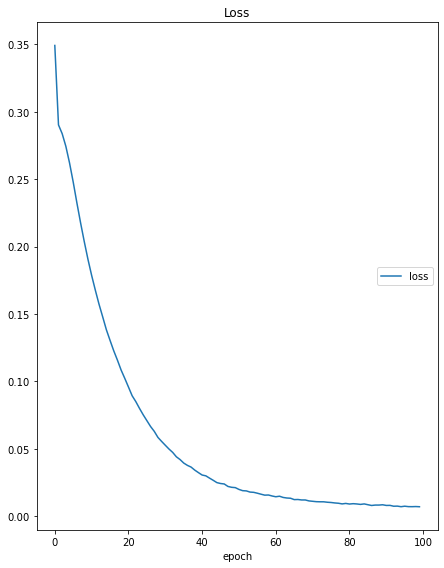

Loss
	loss             	 (min:    0.007, max:    0.349, cur:    0.007)
494/494 [==============================] - 4s 9ms/step - loss: 0.0071


In [38]:
model = nn_model_params(optimizer = 'adam',
                        neurons=32,
                        batch_size=16,
                        epochs=100,
                        activation='sigmoid',
                        patience=10,
                        loss='binary_crossentropy')

In [28]:
# Obtain predictions on the test set
y_pred_genres = model.predict(X_test)

# Evaluate model performance (replace with your preferred metric)
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test_genres, y_pred_genres, average='macro'))

0.8778515262370745


In [39]:
# transformación variables predictoras X del conjunto de test
X_test_dtm = vect_tfidf.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

X_test_dtm_dense = X_test_dtm.toarray()

# Predicción del conjunto de test
y_pred_genres = model.predict(X_test_dtm_dense)

In [40]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_genres, index=dataTesting.index, columns=cols)
res.to_csv('pred_genres_text_RF_idf.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,7.881045e-03,3.018975e-04,1.169903e-08,4.061150e-06,2.846575e-02,0.000840,4.485271e-08,0.455911,1.419293e-07,2.448976e-03,...,7.942256e-05,0.000738,3.977479e-10,9.896249e-01,7.811415e-07,2.187069e-06,2.285410e-06,0.000047,4.092017e-05,8.793736e-06
4,1.834750e-03,1.300066e-05,8.739010e-08,5.013943e-04,4.142022e-01,0.235863,1.035701e-06,0.994322,3.387536e-05,2.210691e-06,...,2.614541e-05,0.000006,1.918242e-07,8.987677e-07,1.253566e-06,7.603677e-06,6.736826e-06,0.400641,4.925388e-06,4.072531e-05
5,1.836121e-04,1.777544e-07,4.331852e-09,2.679229e-03,1.350693e-05,0.981360,1.351535e-04,0.995247,6.727614e-09,1.149084e-07,...,1.143766e-05,0.245670,2.622413e-06,1.968503e-03,2.560262e-05,6.993919e-05,3.528987e-06,0.914990,1.930062e-05,2.864897e-04
6,1.379848e-04,2.246499e-04,2.065357e-07,9.884881e-05,5.376100e-07,0.000111,4.830441e-06,0.998459,7.682005e-07,7.263625e-05,...,7.916181e-07,0.001727,2.450579e-07,5.276203e-04,9.152323e-03,9.530315e-07,3.931490e-06,0.671618,5.040169e-04,3.440015e-05
7,5.644008e-08,1.718679e-06,2.133358e-07,1.595742e-07,7.460979e-02,0.000542,4.918251e-07,0.002077,3.115535e-04,9.550273e-03,...,1.184895e-05,0.001328,4.321249e-08,7.696152e-04,2.746958e-01,1.555252e-05,7.775523e-09,0.213002,1.187504e-08,2.718612e-07


## Otra prueba

In [21]:
# Inicializar lematizador y lista de stop words
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

from sklearn.feature_extraction.text import TfidfVectorizer
import string
import nltk
from nltk.corpus import stopwords

# Descargar stopwords si no lo has hecho antes
nltk.download('stopwords')

# Definir una función para preprocesar el texto
def preprocess_text(text):
    # Convertir el texto a minúsculas
    text = text.lower()
    # Eliminar signos de puntuación
    text = ''.join([char for char in text if char not in string.punctuation])
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    text = ' '.join([word for word in words if word not in stop_words])
    return text

vect_tfidf = TfidfVectorizer(preprocessor=preprocess_text)
X_train_tfidf = vect_tfidf.fit_transform(dataTraining['plot'])
X_test_tfidf = vect_tfidf.transform(dataTesting['plot'])

#X_dtm = vect.fit_transform(dataTraining['plot'])

#print(X_dtm.shape)
print(X_train_tfidf.shape)

# Definición de variable de interés (y)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_train_tfidf, y_genres, test_size=0.33, random_state=42)
X_train = X_train.toarray()
X_test = X_test.toarray()

# Definición de dimensiones de salida y entrada
output_var = y_test_genres.shape[1]
print(output_var, ' output variables')

dims = X_train.shape[1]
print(dims, 'input variables')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(7895, 38535)
24  output variables
38535 input variables


In [22]:
import pandas as pd

# Obtener el vocabulario y sus índices
vocabulario = vect_tfidf.vocabulary_

# Obtener las palabras y sus frecuencias
words = list(vocabulario.keys())  # Obtener las palabras del vocabulario
frequencies = X_train.sum(axis=0).flatten()  # Calcular las frecuencias de las palabras en X_train

# Crear un DataFrame con las palabras y sus frecuencias
word_freq = pd.DataFrame({'word': words, 'frequency': frequencies})

# Ordenar las palabras por frecuencia descendente
word_freq = word_freq.sort_values(by='frequency', ascending=False).reset_index(drop=True)

# Mostrar las palabras y sus frecuencias
print(word_freq.head(300))


             word  frequency
0          eunice  76.473925
1         kwimper  74.878613
2     jourdonnais  64.626099
3           manly  60.169900
4             arn  55.648602
..            ...        ...
295        manuel  13.116084
296        graphs  13.113322
297    councilman  13.108322
298  superhighway  13.085952
299       newland  13.077757

[300 rows x 2 columns]


In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras
# Definición de función que crea una red neuronal a partir de diferentes parámetros (nn_model_params)
# En esta función se consideran 7 parámetos a calibrar, sin embargo se pueden agregar o quitar tantos como lo consideren pertinente
def nn_model_params(optimizer ,
                    neurons,
                    batch_size,
                    epochs,
                    activation,
                    patience,
                    loss):

    K.clear_session()

    # Definición red neuronal con la función Sequential()
    model = Sequential()

    # Definición de las capas de la red con el número de neuronas y la función de activación definidos en la función nn_model_params
    model.add(Dense(neurons, input_shape=(dims,), activation=activation))
    model.add(Dropout(0.1))
    model.add(Dense(output_var, activation=activation))

    # Definición de función de perdida con parámetros definidos en la función nn_model_params
    model.compile(optimizer = optimizer, loss=loss)

    # Definición de la función EarlyStopping con parámetro definido en la función nn_model_params
    early_stopping = EarlyStopping(monitor="val_loss", patience = patience)

    # Entrenamiento de la red neuronal con parámetros definidos en la función nn_model_params
    model.fit(X_train, y_train_genres,
              validation_data = (X_test, y_test_genres),
              epochs=epochs,
              batch_size=batch_size,
              callbacks=[early_stopping, PlotLossesKeras()],
              verbose=True
              )

    return model

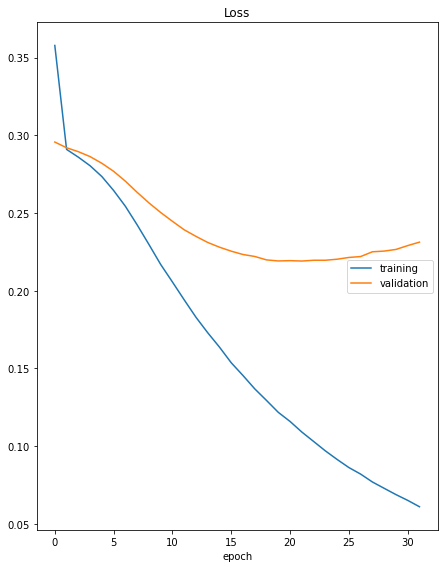

Loss
	training         	 (min:    0.061, max:    0.358, cur:    0.061)
	validation       	 (min:    0.219, max:    0.296, cur:    0.231)
331/331 [==============================] - 5s 15ms/step - loss: 0.0611 - val_loss: 0.2313


In [24]:
model = nn_model_params(optimizer = 'adam',
                        neurons=32,
                        batch_size=16,
                        epochs=100,
                        activation='sigmoid',
                        patience=10,
                        loss='binary_crossentropy')

In [25]:
# Obtain predictions on the test set
y_pred_genres = model.predict(X_test)

# Evaluate model performance (replace with your preferred metric)
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test_genres, y_pred_genres, average='macro'))

0.8746039134680167


In [26]:
# transformación variables predictoras X del conjunto de test
X_test_dtm = vect_tfidf.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

X_test_dtm_dense = X_test_dtm.toarray()

# Predicción del conjunto de test
y_pred_genres = model.predict(X_test_dtm_dense)

In [27]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_genres, index=dataTesting.index, columns=cols)
res.to_csv('pred_genres_text_RF_idf.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.005633,0.019934,0.001515,0.002782,0.136509,0.013773,0.000822,0.680619,0.004559,0.041586,...,0.012161,0.039269,0.000124,0.857657,0.003806,0.003095,0.000971,0.030404,0.001667,0.004860
4,0.034230,0.001299,0.000341,0.036467,0.103663,0.628917,0.005027,0.885104,0.000595,0.001241,...,0.001892,0.005949,0.000377,0.004172,0.000716,0.003111,0.004925,0.237000,0.006195,0.006373
5,0.028970,0.000934,0.000066,0.019640,0.009347,0.853652,0.000486,0.985911,0.000121,0.000273,...,0.001108,0.237225,0.000270,0.038401,0.002539,0.001146,0.001712,0.902947,0.010931,0.002608
6,0.012495,0.006693,0.000388,0.034948,0.011137,0.006963,0.002246,0.972139,0.000446,0.002122,...,0.002820,0.042058,0.000425,0.149705,0.044676,0.002786,0.004679,0.438281,0.055705,0.003655
7,0.002606,0.002624,0.001915,0.003821,0.056632,0.018441,0.001119,0.179467,0.004797,0.071181,...,0.002558,0.129983,0.000246,0.065064,0.170155,0.005222,0.000586,0.273335,0.000184,0.001933


## API

In [51]:
import warnings
warnings.filterwarnings('ignore')

# Importación librerías
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import MultiLabelBinarizer
import re
from nltk.corpus import stopwords

# Descargar stopwords de NLTK si no están disponibles
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('dataTraining.csv', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('dataTesting.csv', encoding='UTF-8', index_col=0)
import string
# Inicializar lematizador y lista de stop words
stop_words = set(stopwords.words('english'))

# Definir una función para preprocesar el texto
def preprocess_text(text):
  # Convertir el texto a minúsculas
  text = text.lower()
  # Eliminar signos de puntuación
  text = ''.join([char for char in text if char not in string.punctuation])
  # Eliminar stopwords
  stop_words = set(stopwords.words('english'))
  words = text.split()
  text = ' '.join([word for word in words if word not in stop_words])

  return text

vect_tfidf = TfidfVectorizer(preprocessor=preprocess_text)
X_train_tfidf = vect_tfidf.fit_transform(dataTraining['plot'])
X_test_tfidf = vect_tfidf.transform(dataTesting['plot'])

print(X_train_tfidf.shape)

# Definición de variable de interés (y)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_train_tfidf, y_genres, test_size=0.33,
                                                                  random_state=42)
X_train = X_train.toarray()
X_test = X_test.toarray()

# Definición de dimensiones de salida y entrada
output_var = y_test_genres.shape[1]
print(output_var, ' output variables')

dims = X_train.shape[1]
print(dims, 'input variables')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(7895, 38535)
24  output variables
38535 input variables


In [52]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras
# Definición de función que crea una red neuronal a partir de diferentes parámetros (nn_model_params)
# En esta función se consideran 7 parámetos a calibrar, sin embargo se pueden agregar o quitar tantos como lo consideren pertinente
def nn_model_params(optimizer ,
                    neurons,
                    batch_size,
                    epochs,
                    activation,
                    patience,
                    loss):

    K.clear_session()

    # Definición red neuronal con la función Sequential()
    model = Sequential()

    # Definición de las capas de la red con el número de neuronas y la función de activación definidos en la función nn_model_params
    model.add(Dense(neurons, input_shape=(dims,), activation=activation))
    model.add(Dropout(0.1))
    model.add(Dense(output_var, activation=activation))

    # Definición de función de perdida con parámetros definidos en la función nn_model_params
    model.compile(optimizer = optimizer, loss=loss)

    # Definición de la función EarlyStopping con parámetro definido en la función nn_model_params
    early_stopping = EarlyStopping(monitor="val_loss", patience = patience)

    # Entrenamiento de la red neuronal con parámetros definidos en la función nn_model_params
    model.fit(X_train, y_train_genres,
              validation_data = (X_test, y_test_genres),
              epochs=epochs,
              batch_size=batch_size,
              callbacks=[early_stopping, PlotLossesKeras()],
              verbose=True
              )

    return model

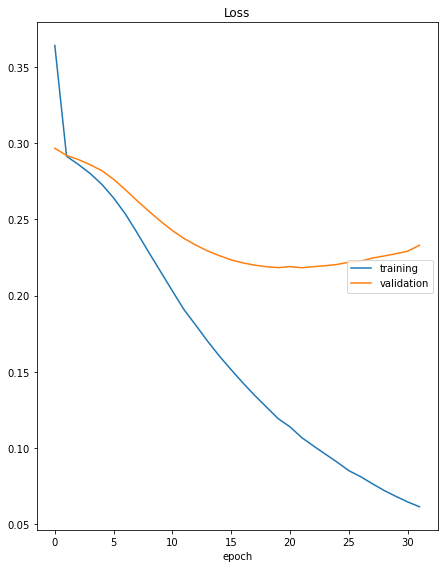

Loss
	training         	 (min:    0.061, max:    0.364, cur:    0.061)
	validation       	 (min:    0.218, max:    0.297, cur:    0.233)
331/331 [==============================] - 4s 11ms/step - loss: 0.0615 - val_loss: 0.2331


In [53]:
model = nn_model_params(optimizer = 'adam',
                        neurons=32,
                        batch_size=16,
                        epochs=100,
                        activation='sigmoid',
                        patience=10,
                        loss='binary_crossentropy')

In [54]:
#joblib.dump(model, 'genre_classification_model.pkl')
joblib.dump(vect_tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

def predict_proba(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    words = text.split()
    text = ' '.join([word for word in words if word not in stop_words])
    # Lemmatize words
    text = ' '.join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])    
    
    return text


# Example input text
documents = ["prueba dos y mas"]

# Initialize the TfidfVectorizer
vect_tfidf = TfidfVectorizer(preprocessor=predict_proba)

# Transform the documents
X_test_tfidf = vect_tfidf.fit_transform(documents)

X_test_tfidf_dense = X_test_tfidf.toarray()


joblib.dump(vect_tfidf, 'tfidf_vectorizer.pkl')





In [46]:
model = joblib.load('genre_classification_model.pkl')
predictions = model.predict(X_test_tfidf_dense)

ValueError: in user code:

    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 38535), found shape=(None, 3)


In [56]:
import string
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

def predict_proba(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    words = text.split()
    text = ' '.join([word for word in words if word not in stop_words])
    # Lemmatize words
    text = ' '.join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])    
    
    return text

# Load the trained model and the vectorizer
model = joblib.load('genre_classification_model.pkl')
vect_tfidf = joblib.load('tfidf_vectorizer.pkl')

# Example input text
documents = ["prueba dos y mas es de terror"]

# Transform the documents using the loaded vectorizer
X_test_tfidf = vect_tfidf.transform(documents)

# Convert the sparse matrix to dense format if required by the model
X_test_tfidf_dense = X_test_tfidf.toarray()

# Make predictions
predictions = model.predict(X_test_tfidf_dense)
print(predictions)


[[0.03352571 0.02908668 0.00570163 0.01548341 0.14452443 0.01191309
  0.01976424 0.11317524 0.01189968 0.01424578 0.00221133 0.00670961
  0.02865753 0.00459221 0.01301509 0.01669392 0.00050601 0.01183796
  0.0112859  0.0099487  0.00626937 0.13146031 0.0037066  0.00509277]]


In [76]:
type(predictions)

numpy.ndarray

In [61]:
from flask import Flask, request
from flask_restx import Api, Resource, fields, reqparse
import joblib
# from m09_model_deployment import predict_proba
from flask_cors import CORS
from werkzeug.datastructures import FileStorage
import pandas as pd

app = Flask(__name__)
api = Api(
    app, 
    version='1.0', 
    title='Car Price Prediction API',
    description='Car Price Prediction API'
)

ns = api.namespace('predict', description='Car Price')

# Definición de campos de respuesta
resource_fields = api.model('Resource', {
    'Prediccion_Precios_Carros': fields.List(fields.Float),
})

# Definición de argumentos para la API
parser = reqparse.RequestParser()
parser.add_argument('Year', type=int, required=True, help='Vehicle Year')
parser.add_argument('Mileage', type=int, required=True, help='Vehicle Mileage')
parser.add_argument('State', type=str, required=True, help='State of the vehicle')
parser.add_argument('Make', type=str, required=True, help='Make of the vehicle')
parser.add_argument('Model', type=str, required=True, help='Model of the vehicle')

# Definición de la clase para la API
@ns.route('/')
class CarPriceApi(Resource):

    @api.doc(parser=parser)
    @api.marshal_with(resource_fields)
    def post(self):
        args = parser.parse_args()

        # Llama a la función predict_price para realizar la predicción
        prediction = predict_proba(args['Year'], args['Mileage'], args['State'], args['Make'], args['Model'])

        # Devuelve el resultado como respuesta JSON
        return {'Prediccion_Precios_Carros': [prediction]}, 200

# Inicia el servidor Flask
if __name__ == '__main__':
    app.run(debug=True, use_reloader=False, host='0.0.0.0', port=5000)


ModuleNotFoundError: No module named 'flask_restx'

In [71]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install flask_restx --index-url https://pypi.org/simple


ERROR: Could not find a version that satisfies the requirement flask_restx (from versions: none)
ERROR: No matching distribution found for flask_restx
Note: you may need to restart the kernel to use updated packages.


In [66]:
pip list

Package                      Version
---------------------------- -------------------
absl-py                      1.0.0
alembic                      1.4.2
aniso8601                    9.0.1
astunparse                   1.6.3
async-generator              1.10
attrs                        19.3.0
backcall                     0.1.0
beautifulsoup4               4.9.0
bleach                       3.1.4
blinker                      1.4
bokeh                        2.0.1
Bottleneck                   1.3.2
brotlipy                     0.7.0
cachetools                   4.2.4
certifi                      2020.4.5.1
certipy                      0.1.3
cffi                         1.14.0
chardet                      3.0.4
click                        7.1.2
cloudpickle                  1.4.1
conda                        4.8.2
conda-package-handling       1.6.0
cryptography                 2.9.2
cycler                       0.10.0
Cython                       0.29.17
cytoolz                      0.1